In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [15]:
sys.path.insert(1, '../src')
from plant import Plant
from sun import Sun
from state import State
import utils
plt.rcParams['figure.figsize'] = [20, 10]

# Toy Model

Toy model for optical part of a solar power tower plant in 2 dimensions for a start.

## Toy Model of the Sun

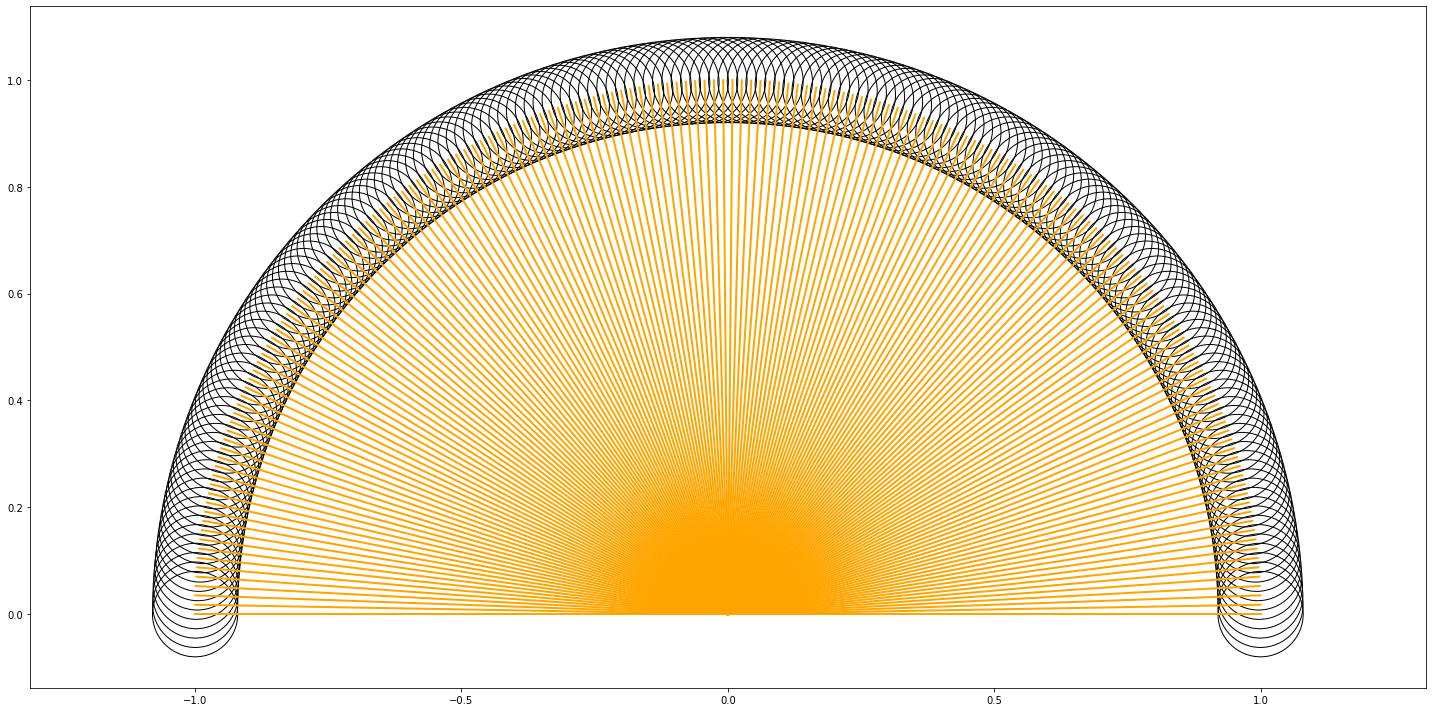

In [11]:
sun = Sun(180)
sun.draw(name="increased-angles")

## Plant and Layout Descriptions

Initialize some plant with some layout. See descriptions in `../data/plants/` and `../data/layouts/` in JSON format.

Tiny Plant: 

	- field area:
		- [x_min, x_max] = [0.00, 35.00]
		- [y_min, y_max] = [0.00, 10.00]
		- diameter = 36.40
		- max_ij = 10.00

	- receiver: 
		- _height = 12.00
		- _angle = 80.00
		- _size = 4.00

	- heliostats:
		- number of heliostats n = 1.00
		- heli_size = 4.00
		- heli_rays = 50.00
		- layout = [[15.00, 5.00], ..., [15.00, 5.00]]

True


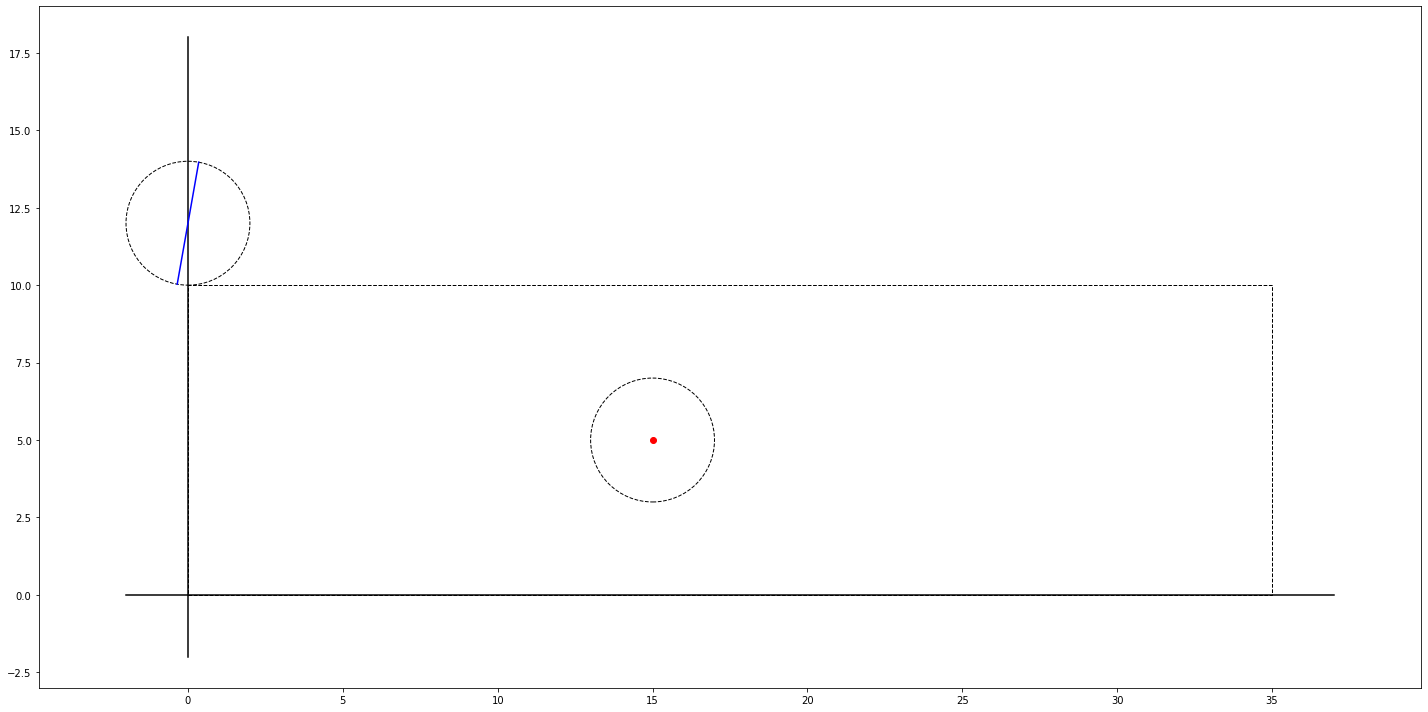

In [16]:
plant = Plant([[15, 5]])
print(plant)
print(plant.valid_layout)
plant.draw(name="singleton")

Effects on heliostat 0: 

	* eta_aa = 0.991269
	* eta_cos = 0.843471
	* eta_sbm = 1.000000
	* received_rays / all_rays = 5 / 5
	* [not-shaded, not-blocked, not-missed] / all_rays = [5 5 5] / 5



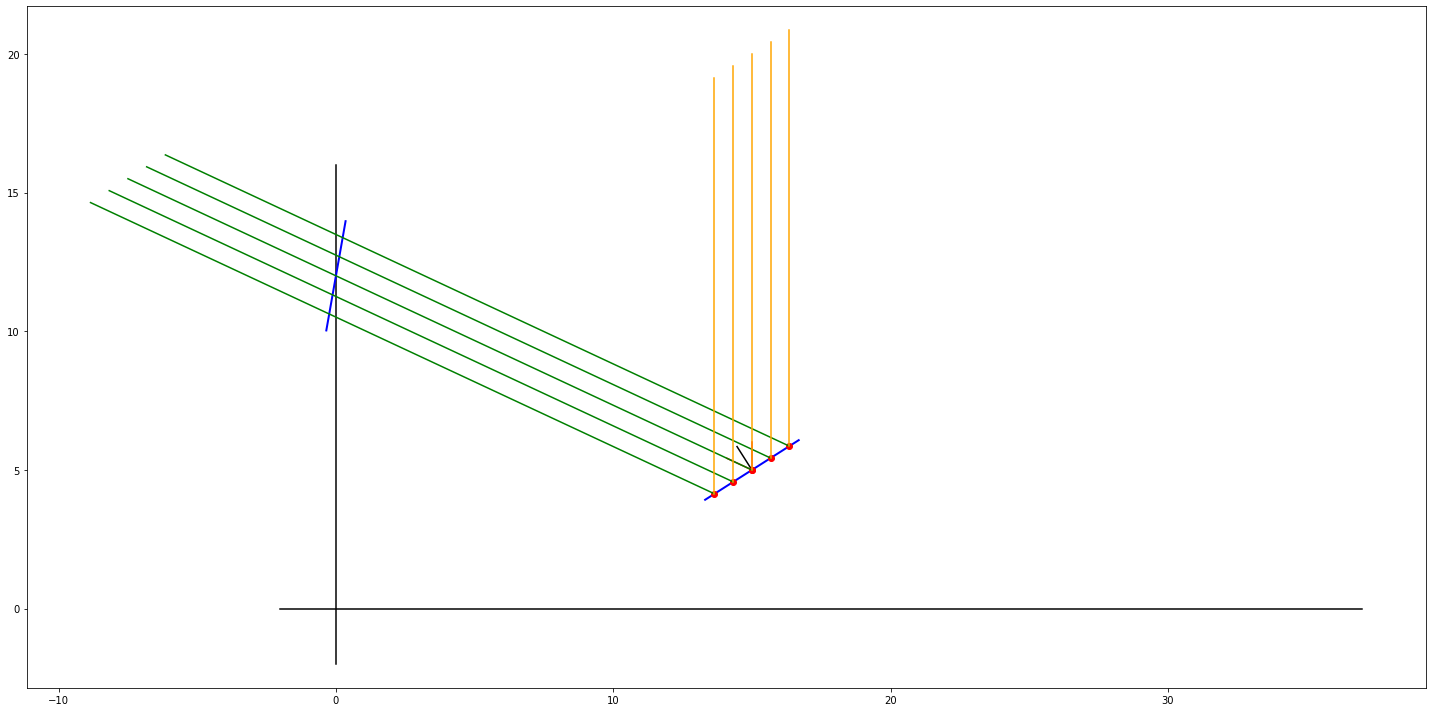

In [13]:
state = State(plant, sun_angle=np.radians(90))
effects = state.get_effects(i=0, verbose=True)
state.draw(i=0, name='limited-rays')

Effects on heliostat 0: 

	* eta_aa = 0.991269
	* eta_cos = 0.843471
	* eta_sbm = 1.000000
	* received_rays / all_rays = 50 / 50
	* [not-shaded, not-blocked, not-missed] / all_rays = [50 50 50] / 50



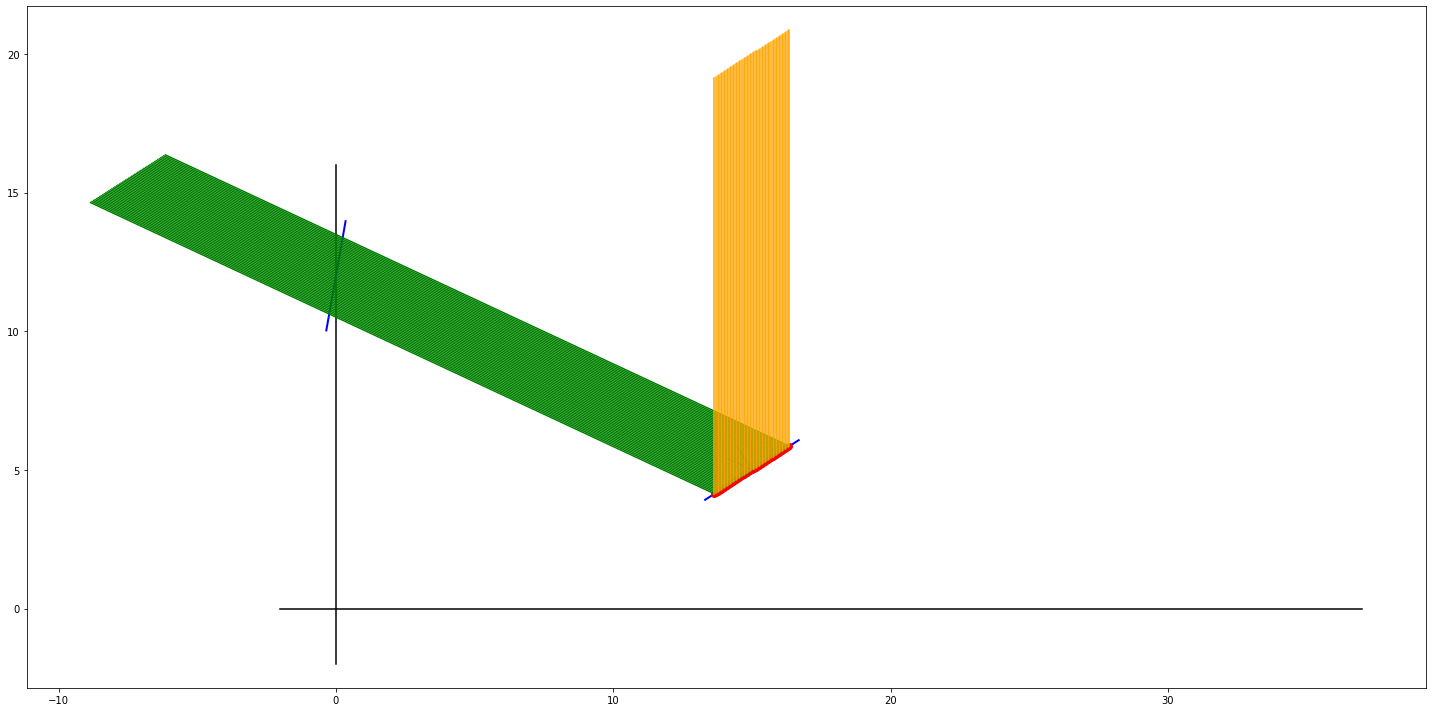

In [17]:
state = State(plant, sun_angle=np.radians(90))
effects = state.get_effects(i=0, verbose=True)
state.draw(i=0, name='increased-rays')

## Evaluation

In [ ]:
energy, stats_df, powers = utils.get_energy(plant, do_stats=True)
utils.draw(plant, powers)
stats_df